In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0


In [3]:
x_train.shape

(60000, 28, 28, 1)

In [4]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  
])


In [5]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)


Epoch 1/5
844/844 [==============================] - 24s 14ms/step - loss: 0.1650 - accuracy: 0.9507 - val_loss: 0.0620 - val_accuracy: 0.9820
Epoch 2/5
844/844 [==============================] - 5s 6ms/step - loss: 0.0499 - accuracy: 0.9848 - val_loss: 0.0510 - val_accuracy: 0.9863
Epoch 3/5
844/844 [==============================] - 4s 5ms/step - loss: 0.0342 - accuracy: 0.9895 - val_loss: 0.0524 - val_accuracy: 0.9830
Epoch 4/5
844/844 [==============================] - 4s 4ms/step - loss: 0.0258 - accuracy: 0.9919 - val_loss: 0.0337 - val_accuracy: 0.9915
Epoch 5/5
844/844 [==============================] - 4s 4ms/step - loss: 0.0190 - accuracy: 0.9937 - val_loss: 0.0425 - val_accuracy: 0.9887


In [6]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")


313/313 [==============================] - 1s 3ms/step - loss: 0.0356 - accuracy: 0.9876
Test Accuracy: 0.9876


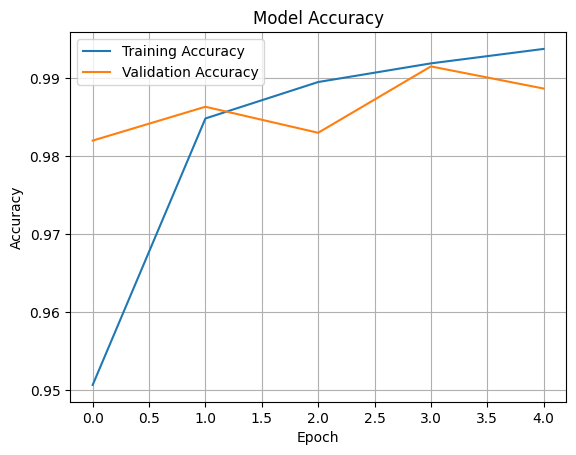

In [7]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
